#  Introduction
For our project we set out with the goal of discovering the neighborhood in Pittsburgh where you are most likely to slip. At first our group considered finding which neighborhood was most dog friendly or greenest, however we landed on slipping risk as we thought it would be easier to measure and more important.

In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# The Metric
Our metric is based on which neighborhood has the most slipping risks. The features that we are using to measure this are staircases due to risk of falling, water features due to risk of slipping on wet surfaces, and grocery stores due to risk of banana peels being left in the vicinity.


Stairs by Neighborhood:

South Side Slopes         109
Mount Washington          54
Perry North               48
Beechview                 42
Greenfield                40
Carrick                   39
Brookline                 38
Elliott                   36
Perry South               35
Sheraden                  35
Beltzhoover               32
Marshall-Shadeland        32
Highland Park             28
Squirrel Hill South       28
Duquesne Heights          24
Allentown                 23
Upper Hill                21
Hazelwood                 21
Spring Hill-City View     20
Polish Hill               20
Overbrook                 19
Fineview                  18
Troy Hill                 18
Lower Lawrenceville       17
Arlington                 15
Garfield                  15
Westwood                  14
Brighton Heights          13
Stanton Heights           13
Spring Garden             13
Upper Lawrenceville       12
Lincoln-Lemington-Belmar  12
Middle Hill               11
South Oakland    

Text(0, 0.5, 'Neighborhood')

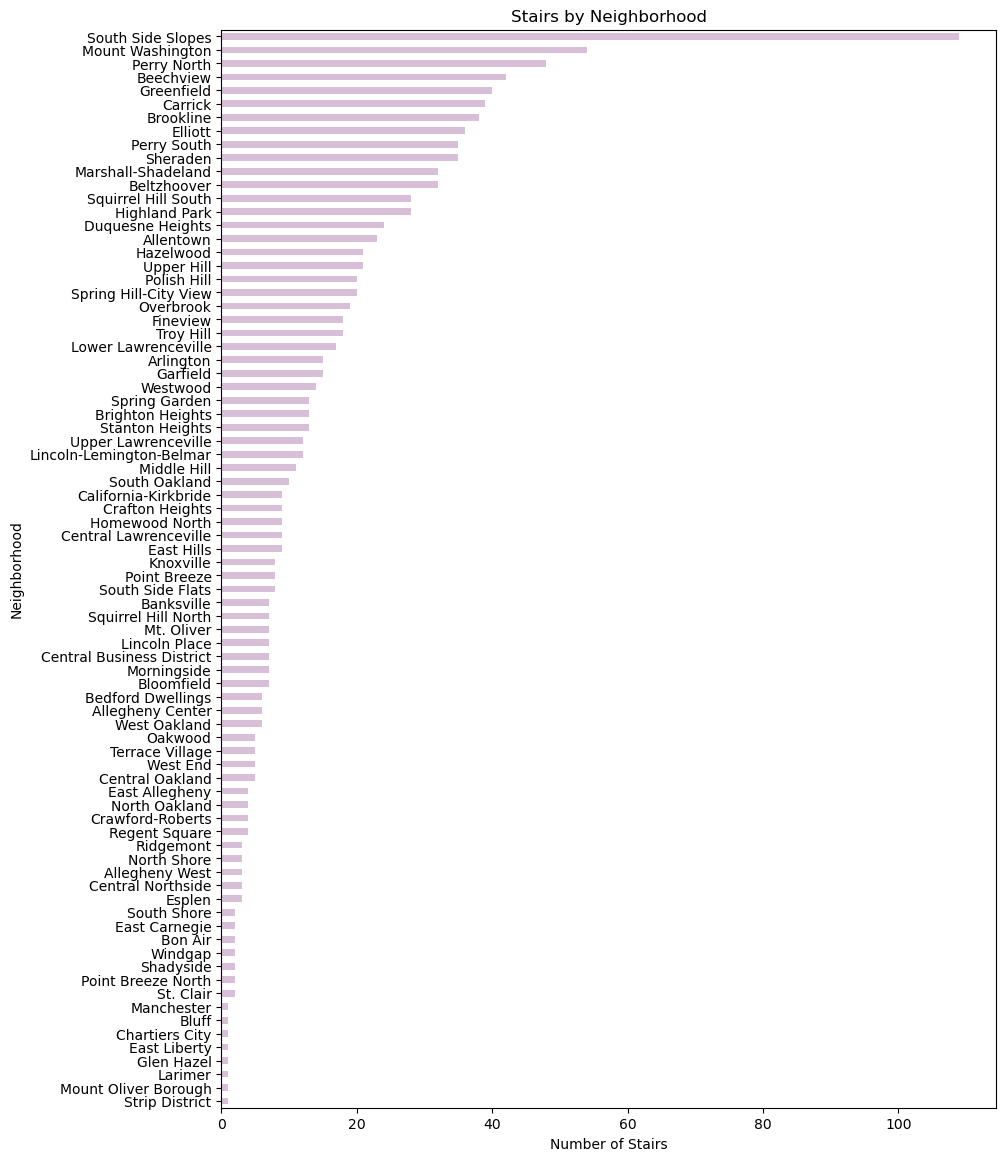

In [8]:
#import
df = pd.read_csv("stairs.csv")

#counts stairs
stair_counts = df['neighborhood'].value_counts().sort_values(ascending=False)
total_stairs = stair_counts.sum()

#print results
print("Stairs by Neighborhood:\n")
for neighborhood, count in stair_counts.items():
    print(f"{neighborhood:<25} {count}")
print("Total stairs \t\t", total_stairs)

#bar chart (vertical for easy reading)
stair_counts.sort_values().plot(kind='barh', color='thistle', figsize=(10, 14))
plt.title('Stairs by Neighborhood')
plt.xlabel('Number of Stairs')
plt.ylabel('Neighborhood')

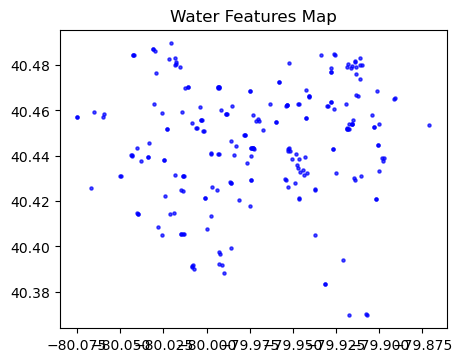

In [9]:
slope = pd.read_csv("Water_Features.csv")
waterPoints = gpd.GeoDataFrame(slope, geometry=gpd.points_from_xy(slope['longitude'], slope['latitude']), crs="EPSG:4326")
#plot points
waterPoints.plot(figsize=(5, 5), color='blue', markersize=5, alpha=0.7)
plt.title("Water Features Map")
plt.show()

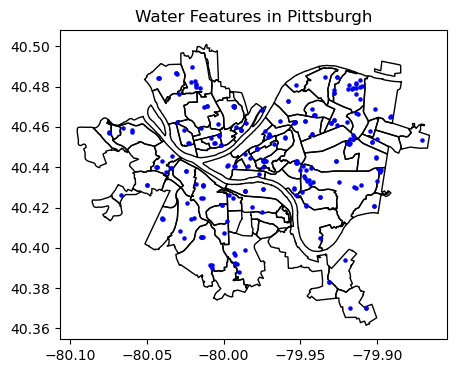

In [14]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
waterPointsLinedUp = waterPoints.to_crs(neighborhoods.crs)#this lines up the points with neighborhoods
ax = neighborhoods.plot(figsize=(5, 5), edgecolor='black', facecolor='none')

#this puts the data on top of the neighboorhods
waterPointsLinedUp.plot(ax=ax, color='blue', markersize=5)

plt.title("Water Features in Pittsburgh")
plt.show()

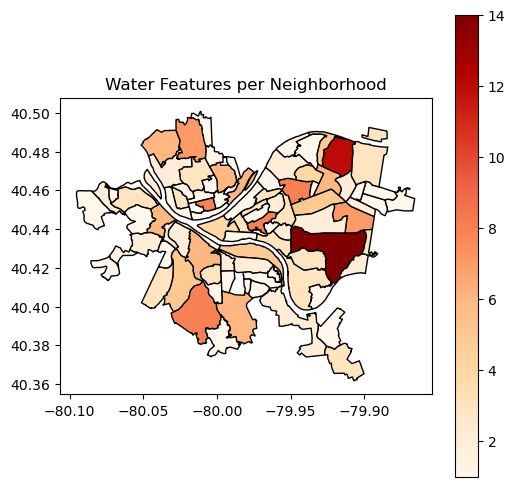

In [16]:
#puts the data points joined into neighboorhoods and counts them
joined = gpd.sjoin(neighborhoods, waterPoints, how="left", predicate='contains')
neighborhoodCounts = joined.groupby(joined.index).size()
#add count of water feature data to each neighborhoods data
neighborhoods['water_count'] = neighborhoodCounts
neighborhoods['water_count'] = neighborhoods['water_count'].fillna(0)

ax = neighborhoods.plot(column='water_count', cmap='OrRd', legend=True, edgecolor='black', figsize=(6, 6))
ax.set_title("Water Features per Neighborhood")
plt.show()

In [17]:
#Sorts water_count and prints it
top_neighborhood = neighborhoods.sort_values(by='water_count', ascending=False).head(5)
print(top_neighborhood[['hood', 'water_count']])

                   hood  water_count
24  Squirrel Hill South           14
36        Highland Park           12
65      Terrace Village            8
58     Allegheny Center            8
31           Bloomfield            8


## Calculation + total map
We made it so that one staircase was the base unit. Therefore one water feature has the weight 6 staircases, and one grocery store has the weight 50 staircases.

In [29]:
#answer calculation
neighborhoods["totalPoints"] = neighborhoods["hood_no"] + neighborhoods["water_count"] * 6
print(neighborhoods[['hood', 'hood_no', 'water_count', 'totalPoints']].sort_values('totalPoints', ascending=False).head())

                     hood  hood_no  water_count  totalPoints
24    Squirrel Hill South       77           14          161
65        Terrace Village       83            8          131
27              Troy Hill       84            6          120
36          Highland Park       40           12          112
6   Spring Hill-City View       75            6          111


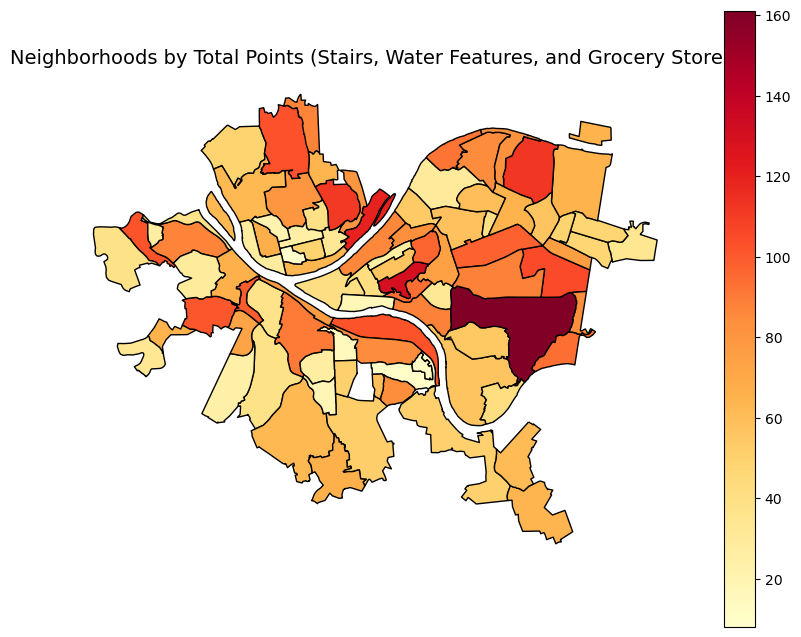

In [27]:
map = neighborhoods.plot(column='totalPoints',cmap='YlOrRd', legend=True,edgecolor='black',figsize=(10, 8))
map.set_title("Neighborhoods by Total Points (Stairs, Water Features, and Grocery Stores)", fontsize=14)
map.set_axis_off()
plt.show()

# The Best Neighborhood
In the end we found that you are most likely to slip and fall in _______, this is likely due to the abundance of staircases needed, being paired with parks and a higher population adding to the need for water features and grocery stores.


# Conclusion


